<a href="https://colab.research.google.com/github/DivyeSatija/RonaldoVsMessi/blob/main/FootballAnalysisUsingPython.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Messi vs Ronaldo - An Analytical Debate

## Flow of the Webinar:
1. Get data from [Understat](https://understat.com/) for Messi and Ronaldo
3. Data Cleaning and Exploration of the data for Messi and Ronaldo on different aspects
2. Comparative Analysis
3. Shot Analysis
3. The Final comparison

In [ ]:
# Import required libraries:
import json
import pandas as pd
from bs4 import BeautifulSoup
from urllib.request import urlopen
from sklearn.preprocessing import MinMaxScaler

# Import plotting libraries:
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from matplotlib.patches import Arc
from plotly.subplots import make_subplots

# Get that Data!

## Cristiano Ronaldo

### Season-wise data

In [ ]:
# Scrape Cristiano player stats:
cris_scrape_url = "https://understat.com/player/2371"
page_connect = urlopen(cris_scrape_url)
page_html = BeautifulSoup(page_connect, "html.parser")

json_raw_string = page_html.findAll(name="script")[1].text
start_ind = json_raw_string.index("\\")
stop_ind = json_raw_string.index("')")

json_data = json_raw_string[start_ind:stop_ind]
json_data = json_data.encode("utf8").decode("unicode_escape")

cris_season_wise_meta_df = pd.json_normalize(json.loads(json_data)["season"])
cris_season_wise_meta_df.insert(0, "Player", "Cristiano")

In [ ]:
cris_season_wise_meta_df

,Player,position,games,goals,shots,time,xG,assists,xA,key_passes,season,team,yellow,red,npg,npxG,xGChain,xGBuildup
0,Cristiano,FW,15,8,55,1210,9.795196533203125,3,1.5542288646101952,11,2021,Manchester United,4,0,6,8.272858917713165,11.281124845147133,2.763850102201104
1,Cristiano,Sub,1,0,1,28,0.20496894419193268,0,0.03537696972489357,1,2021,Juventus,1,0,0,0.20496894419193268,0.051310088485479355,0.015933118760585785
2,Cristiano,FW,33,29,167,2807,29.83808070421219,3,3.8546393513679504,36,2020,Juventus,3,0,23,23.74781009554863,28.635406404733658,8.915717896074057
3,Cristiano,FWL,33,31,208,2920,29.431679474189878,5,6.067225832492113,51,2019,Juventus,3,0,19,19.53495633788407,26.5536093339324,7.224641568958759
4,Cristiano,FW,31,21,175,2692,23.32403990253806,8,5.193873833864927,48,2018,Juventus,3,0,16,18.75628685578704,21.854169853031635,7.177339139394462
5,Cristiano,FW,27,26,178,2304,26.999303579330444,5,5.524841643869877,40,2017,Real Madrid,1,0,23,24.02619305253029,31.62383733689785,9.47185287065804
6,Cristiano,FWL,29,25,162,2546,25.413737758994102,6,4.591035931371152,31,2016,Real Madrid,4,0,19,19.467644795775414,29.57457834482193,8.661094894632697
7,Cristiano,AML,36,35,227,3186,35.58900645375252,11,8.606404347345233,51,2015,Real Madrid,3,0,29,28.899507626891136,40.81802845001221,9.863004602491856
8,Cristiano,FWL,35,48,225,3103,39.30876067932695,16,13.600642347708344,76,2014,Real Madrid,5,1,38,30.389685845933855,43.60801999177784,7.5202372539788485


### Shots Data

In [ ]:
# Scrape Cristiano shot data:
json_raw_string = page_html.findAll(name="script")[3].text
start_ind = json_raw_string.index("\\")
stop_ind = json_raw_string.index("')")

json_data = json_raw_string[start_ind:stop_ind]
json_data = json_data.encode("utf8").decode("unicode_escape")

cris_shots_df = pd.json_normalize(json.loads(json_data))
cris_shots_df.insert(0, "Player", "Cristiano")

In [ ]:
cris_shots_df

,Player,id,minute,result,X,Y,xG,player,h_a,player_id,situation,season,shotType,match_id,h_team,a_team,h_goals,a_goals,date,player_assisted,lastAction
0,Cristiano,32535,18,SavedShot,0.845,0.49900001525878906,0.06659495085477829,Cristiano Ronaldo,h,2371,SetPiece,2014,RightFoot,5834,Real Madrid,Cordoba,2,0,2014-08-25 19:00:00,Luka Modric,Pass
1,Cristiano,32551,85,BlockedShot,0.7680000305175781,0.625,0.03090905211865902,Cristiano Ronaldo,h,2371,OpenPlay,2014,LeftFoot,5834,Real Madrid,Cordoba,2,0,2014-08-25 19:00:00,Toni Kroos,Pass
2,Cristiano,32552,89,Goal,0.7080000305175781,0.6719999694824219,0.022334257140755653,Cristiano Ronaldo,h,2371,OpenPlay,2014,RightFoot,5834,Real Madrid,Cordoba,2,0,2014-08-25 19:00:00,Isco,Pass
3,Cristiano,32912,13,MissedShots,0.8159999847412109,0.245,0.02082291804254055,Cristiano Ronaldo,h,2371,OpenPlay,2014,RightFoot,5789,Real Madrid,Atletico Madrid,1,2,2014-09-13 19:00:00,Toni Kroos,Pass
4,Cristiano,32917,25,Goal,0.885,0.5,0.7432776093482971,Cristiano Ronaldo,h,2371,Penalty,2014,RightFoot,5789,Real Madrid,Atletico Madrid,1,2,2014-09-13 19:00:00,None,Standard
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1393,Cristiano,450899,34,Goal,0.9290000152587891,0.5420000076293945,0.579865038394928,Cristiano Ronaldo,h,2371,OpenPlay,2021,RightFoot,16574,Manchester United,Burnley,3,1,2021-12-30 20:15:00,None,Rebound
1394,Cristiano,450901,40,MissedShots,0.9540000152587891,0.47200000762939454,0.08588705211877823,Cristiano Ronaldo,h,2371,FromCorner,2021,Head,16574,Manchester United,Burnley,3,1,2021-12-30 20:15:00,Mason Greenwood,Aerial
1395,Cristiano,450903,48,MissedShots,0.9080000305175782,0.43900001525878907,0.07811526209115982,Cristiano Ronaldo,h,2371,OpenPlay,2021,Head,16574,Manchester United,Burnley,3,1,2021-12-30 20:15:00,Mason Greenwood,Cross
1396,Cristiano,450908,78,BlockedShot,0.7669999694824219,0.5570000076293945,0.07671710103750229,Cristiano Ronaldo,h,2371,DirectFreekick,2021,RightFoot,16574,Manchester United,Burnley,3,1,2021-12-30 20:15:00,None,Standard


## Messi

### Season-wise data

In [ ]:
# Scrape Messi player stats:
messi_scrape_url = "https://understat.com/player/2097"
page_connect = urlopen(messi_scrape_url)
page_html = BeautifulSoup(page_connect, "html.parser")

json_raw_string = page_html.findAll(name="script")[1].text
start_ind = json_raw_string.index("\\")
stop_ind = json_raw_string.index("')")

json_data = json_raw_string[start_ind:stop_ind]
json_data = json_data.encode("utf8").decode("unicode_escape")

messi_season_wise_meta_df = pd.json_normalize(json.loads(json_data)["season"])
messi_season_wise_meta_df.insert(0, "Player", "Messi")

In [ ]:
messi_season_wise_meta_df

,Player,position,games,goals,shots,time,xG,assists,xA,key_passes,season,team,yellow,red,npg,npxG,xGChain,xGBuildup
0,Messi,Sub,11,1,43,869,4.620387986302376,4,3.4615752324461937,24,2021,Paris Saint Germain,0,0,1,4.620387986302376,9.98707789182663,4.3963952995836735
1,Messi,FW,35,30,195,3017,26.676843278110027,9,11.422847747802734,77,2020,Barcelona,4,0,27,22.96045546978712,37.906863175332546,20.33736250922084
2,Messi,Sub,33,25,159,2876,20.84966728463769,20,16.593363385647535,88,2019,Barcelona,4,0,20,17.133279267698526,34.92346678301692,13.53765751607716
3,Messi,FW,34,36,170,2704,25.997169069945812,13,15.33516551926732,93,2018,Barcelona,3,0,32,22.28090887516737,38.45987746119499,10.69879900291562
4,Messi,FW,36,34,196,2995,28.946280613541603,12,15.100405622273684,87,2017,Barcelona,3,0,32,25.973170146346092,48.18063422292471,21.634404016658664
5,Messi,FWR,34,37,179,2832,26.885174363851547,9,13.955131396651268,79,2016,Barcelona,6,0,31,21.682230830192566,42.52504535019398,18.13351222872734
6,Messi,FWR,33,26,158,2726,27.101910315454006,16,15.871278138831258,77,2015,Barcelona,3,0,23,21.899351350963116,41.99686624109745,15.196364373899996
7,Messi,FW,38,43,187,3374,35.89176357910037,18,17.61195552162826,95,2014,Barcelona,4,0,38,31.432097773998976,54.75360991060734,19.75672373920679


### Shots Data

In [ ]:
# Scrape Messi shot data:
json_raw_string = page_html.findAll(name="script")[3].text
start_ind = json_raw_string.index("\\")
stop_ind = json_raw_string.index("')")

json_data = json_raw_string[start_ind:stop_ind]
json_data = json_data.encode("utf8").decode("unicode_escape")

messi_shots_df = pd.json_normalize(json.loads(json_data))
messi_shots_df.insert(0, "Player", "Messi")

In [ ]:
messi_shots_df

,Player,id,minute,result,X,Y,xG,player,h_a,player_id,situation,season,shotType,match_id,h_team,a_team,h_goals,a_goals,date,player_assisted,lastAction
0,Messi,32522,22,MissedShots,0.7859999847412109,0.52,0.03867039829492569,Lionel Messi,h,2097,OpenPlay,2014,LeftFoot,5831,Barcelona,Elche,3,0,2014-08-24 20:00:00,Rafinha,Pass
1,Messi,32525,41,Goal,0.8619999694824219,0.615,0.06870150566101074,Lionel Messi,h,2097,OpenPlay,2014,LeftFoot,5831,Barcelona,Elche,3,0,2014-08-24 20:00:00,Sergio Busquets,BallRecovery
2,Messi,32529,62,Goal,0.86,0.435,0.15034306049346924,Lionel Messi,h,2097,OpenPlay,2014,LeftFoot,5831,Barcelona,Elche,3,0,2014-08-24 20:00:00,None,TakeOn
3,Messi,32769,3,SavedShot,0.8180000305175781,0.38,0.045503295958042145,Lionel Messi,a,2097,OpenPlay,2014,LeftFoot,5842,Villarreal,Barcelona,0,1,2014-08-31 18:00:00,Pedro,Pass
4,Messi,32773,27,SavedShot,0.8690000152587891,0.19200000762939454,0.06531666964292526,Lionel Messi,a,2097,DirectFreekick,2014,LeftFoot,5842,Villarreal,Barcelona,0,1,2014-08-31 18:00:00,None,Standard
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1282,Messi,448661,70,ShotOnPost,0.9080000305175782,0.34700000762939454,0.2767370343208313,Lionel Messi,h,2097,OpenPlay,2021,RightFoot,17999,Paris Saint Germain,Monaco,2,0,2021-12-12 19:45:00,Kylian Mbappe-Lottin,Pass
1283,Messi,450252,25,ShotOnPost,0.835999984741211,0.6179999923706054,0.054604314267635345,Lionel Messi,a,2097,OpenPlay,2021,LeftFoot,18004,Lorient,Paris Saint Germain,1,1,2021-12-22 19:45:00,Ángel Di María,Pass
1284,Messi,450267,73,MissedShots,0.75,0.549000015258789,0.02145405486226082,Lionel Messi,a,2097,OpenPlay,2021,LeftFoot,18004,Lorient,Paris Saint Germain,1,1,2021-12-22 19:45:00,Mauro Icardi,Pass
1285,Messi,450268,79,SavedShot,0.9580000305175781,0.6569999694824219,0.18739421665668488,Lionel Messi,a,2097,FromCorner,2021,LeftFoot,18004,Lorient,Paris Saint Germain,1,1,2021-12-22 19:45:00,Ángel Di María,Pass


## Build Final Season-level and shots data

### Joint Season-wise Data

In [ ]:
season_wise_meta_df = cris_season_wise_meta_df.append(messi_season_wise_meta_df)
season_wise_meta_df

,Player,position,games,goals,shots,time,xG,assists,xA,key_passes,season,team,yellow,red,npg,npxG,xGChain,xGBuildup
0,Cristiano,FW,15,8,55,1210,9.795196533203125,3,1.5542288646101952,11,2021,Manchester United,4,0,6,8.272858917713165,11.281124845147133,2.763850102201104
1,Cristiano,Sub,1,0,1,28,0.20496894419193268,0,0.03537696972489357,1,2021,Juventus,1,0,0,0.20496894419193268,0.051310088485479355,0.015933118760585785
2,Cristiano,FW,33,29,167,2807,29.83808070421219,3,3.8546393513679504,36,2020,Juventus,3,0,23,23.74781009554863,28.635406404733658,8.915717896074057
3,Cristiano,FWL,33,31,208,2920,29.431679474189878,5,6.067225832492113,51,2019,Juventus,3,0,19,19.53495633788407,26.5536093339324,7.224641568958759
4,Cristiano,FW,31,21,175,2692,23.32403990253806,8,5.193873833864927,48,2018,Juventus,3,0,16,18.75628685578704,21.854169853031635,7.177339139394462
5,Cristiano,FW,27,26,178,2304,26.999303579330444,5,5.524841643869877,40,2017,Real Madrid,1,0,23,24.02619305253029,31.62383733689785,9.47185287065804
6,Cristiano,FWL,29,25,162,2546,25.413737758994102,6,4.591035931371152,31,2016,Real Madrid,4,0,19,19.467644795775414,29.57457834482193,8.661094894632697
7,Cristiano,AML,36,35,227,3186,35.58900645375252,11,8.606404347345233,51,2015,Real Madrid,3,0,29,28.899507626891136,40.81802845001221,9.863004602491856
8,Cristiano,FWL,35,48,225,3103,39.30876067932695,16,13.600642347708344,76,2014,Real Madrid,5,1,38,30.389685845933855,43.60801999177784,7.5202372539788485
0,Messi,Sub,11,1,43,869,4.620387986302376,4,3.4615752324461937,24,2021,Paris Saint Germain,0,0,1,4.620387986302376,9.98707789182663,4.3963952995836735


### Joint Shots Data

In [ ]:
shots_df = cris_shots_df.append(messi_shots_df)
shots_df

,Player,id,minute,result,X,Y,xG,player,h_a,player_id,situation,season,shotType,match_id,h_team,a_team,h_goals,a_goals,date,player_assisted,lastAction
0,Cristiano,32535,18,SavedShot,0.845,0.49900001525878906,0.06659495085477829,Cristiano Ronaldo,h,2371,SetPiece,2014,RightFoot,5834,Real Madrid,Cordoba,2,0,2014-08-25 19:00:00,Luka Modric,Pass
1,Cristiano,32551,85,BlockedShot,0.7680000305175781,0.625,0.03090905211865902,Cristiano Ronaldo,h,2371,OpenPlay,2014,LeftFoot,5834,Real Madrid,Cordoba,2,0,2014-08-25 19:00:00,Toni Kroos,Pass
2,Cristiano,32552,89,Goal,0.7080000305175781,0.6719999694824219,0.022334257140755653,Cristiano Ronaldo,h,2371,OpenPlay,2014,RightFoot,5834,Real Madrid,Cordoba,2,0,2014-08-25 19:00:00,Isco,Pass
3,Cristiano,32912,13,MissedShots,0.8159999847412109,0.245,0.02082291804254055,Cristiano Ronaldo,h,2371,OpenPlay,2014,RightFoot,5789,Real Madrid,Atletico Madrid,1,2,2014-09-13 19:00:00,Toni Kroos,Pass
4,Cristiano,32917,25,Goal,0.885,0.5,0.7432776093482971,Cristiano Ronaldo,h,2371,Penalty,2014,RightFoot,5789,Real Madrid,Atletico Madrid,1,2,2014-09-13 19:00:00,None,Standard
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1282,Messi,448661,70,ShotOnPost,0.9080000305175782,0.34700000762939454,0.2767370343208313,Lionel Messi,h,2097,OpenPlay,2021,RightFoot,17999,Paris Saint Germain,Monaco,2,0,2021-12-12 19:45:00,Kylian Mbappe-Lottin,Pass
1283,Messi,450252,25,ShotOnPost,0.835999984741211,0.6179999923706054,0.054604314267635345,Lionel Messi,a,2097,OpenPlay,2021,LeftFoot,18004,Lorient,Paris Saint Germain,1,1,2021-12-22 19:45:00,Ángel Di María,Pass
1284,Messi,450267,73,MissedShots,0.75,0.549000015258789,0.02145405486226082,Lionel Messi,a,2097,OpenPlay,2021,LeftFoot,18004,Lorient,Paris Saint Germain,1,1,2021-12-22 19:45:00,Mauro Icardi,Pass
1285,Messi,450268,79,SavedShot,0.9580000305175781,0.6569999694824219,0.18739421665668488,Lionel Messi,a,2097,FromCorner,2021,LeftFoot,18004,Lorient,Paris Saint Germain,1,1,2021-12-22 19:45:00,Ángel Di María,Pass


In [ ]:
shots_df.describe()

,Player,id,minute,result,X,Y,xG,player,h_a,player_id,situation,season,shotType,match_id,h_team,a_team,h_goals,a_goals,date,player_assisted,lastAction
count,2685,2685,2685,2685,2685,2685,2685,2685,2685,2685,2685,2685,2685,2685,2685,2685,2685,2685,2685,1869,2685
unique,2,2685,97,5,309,512,2588,2,2,2,5,8,4,482,66,70,11,8,477,118,22
top,Cristiano,36148,50,MissedShots,0.885,0.5,0.7432776093482971,Cristiano Ronaldo,h,2371,OpenPlay,2014,LeftFoot,1451,Barcelona,Barcelona,2,1,2015-05-17 18:00:00,Luis Suárez,Pass
freq,1398,1,41,785,116,109,67,1398,1515,1398,1923,412,1430,14,720,566,675,851,16,126,1072


# Data Cleaning and EDA

## On Season-wise data

### Numerical EDA

In [ ]:
season_wise_meta_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17 entries, 0 to 7
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Player      17 non-null     object
 1   position    17 non-null     object
 2   games       17 non-null     object
 3   goals       17 non-null     object
 4   shots       17 non-null     object
 5   time        17 non-null     object
 6   xG          17 non-null     object
 7   assists     17 non-null     object
 8   xA          17 non-null     object
 9   key_passes  17 non-null     object
 10  season      17 non-null     object
 11  team        17 non-null     object
 12  yellow      17 non-null     object
 13  red         17 non-null     object
 14  npg         17 non-null     object
 15  npxG        17 non-null     object
 16  xGChain     17 non-null     object
 17  xGBuildup   17 non-null     object
dtypes: object(18)
memory usage: 2.5+ KB


In [ ]:
season_wise_meta_df = season_wise_meta_df.apply(pd.to_numeric, errors="ignore")

In [ ]:
season_wise_meta_df = season_wise_meta_df.round(2)

In [ ]:
season_wise_meta_df.describe().round(1)

,games,goals,shots,time,xG,assists,xA,key_passes,season,yellow,red,npg,npxG,xGChain,xGBuildup
count,17.0,17.0,17.0,17.0,17.0,17.0,17.0,17.0,17.0,17.0,17.0,17.0,17.0,17.0,17.0
mean,29.1,26.8,157.9,2481.7,24.5,9.3,9.3,56.8,2017.7,3.2,0.1,22.2,20.1,31.9,10.9
std,10.2,13.3,63.9,909.4,10.6,5.8,5.9,29.7,2.4,1.5,0.2,11.5,8.6,14.5,6.3
min,1.0,0.0,1.0,28.0,0.2,0.0,0.0,1.0,2014.0,0.0,0.0,0.0,0.2,0.0,0.0
25%,29.0,25.0,159.0,2546.0,23.3,5.0,4.6,36.0,2016.0,3.0,0.0,19.0,18.8,26.6,7.2
50%,33.0,29.0,175.0,2807.0,26.9,9.0,8.6,51.0,2018.0,3.0,0.0,23.0,21.9,34.9,9.5
75%,35.0,35.0,195.0,2995.0,29.4,13.0,15.1,79.0,2020.0,4.0,0.0,31.0,24.0,42.0,15.2
max,38.0,48.0,227.0,3374.0,39.3,20.0,17.6,95.0,2021.0,6.0,1.0,38.0,31.4,54.8,21.6


In [ ]:
season_wise_meta_df.groupby(["Player"]).describe().round(1)

games                                ... xGBuildup                             
          count  mean   std   min   25%   50%  ...       std  min   25%   50%   75%   max
Player                                         ...                                       
Cristiano   9.0  26.7  11.5   1.0  27.0  31.0  ...       3.3  0.0   7.2   7.5   8.9   9.9
Messi       8.0  31.8   8.5  11.0  33.0  34.0  ...       5.8  4.4  12.8  16.7  19.9  21.6

[2 rows x 120 columns]

In [ ]:
season_wise_meta_df.groupby(["Player", "team"])["goals"].sum()

Player     team               
Cristiano  Juventus                81
           Manchester United        8
           Real Madrid            134
Messi      Barcelona              231
           Paris Saint Germain      1
Name: goals, dtype: int64

### Visual EDA

In [ ]:
num_cols = season_wise_meta_df.select_dtypes(exclude=[object]).columns

In [ ]:
num_cols

Index(['games', 'goals', 'shots', 'time', 'xG', 'assists', 'xA', 'key_passes',
       'season', 'yellow', 'red', 'npg', 'npxG', 'xGChain', 'xGBuildup'],
      dtype='object')

In [ ]:
num_cols.__len__()

15

In [ ]:
season_wise_meta_df.groupby(["Player"])[num_cols].sum()

,games,goals,shots,time,xG,assists,xA,key_passes,season,yellow,red,npg,npxG,xGChain,xGBuildup
Player,,,,,,,,,,,,,,,
Cristiano,240,223,1398,20796,219.90,57,49.02,345,18161,27,1,173,173.30,233.99,61.61
Messi,254,232,1287,21393,196.98,101,109.35,620,16140,27,0,204,167.97,308.74,123.70


In [ ]:
total_df = season_wise_meta_df.groupby(["Player"])[num_cols].sum().round(1).reset_index()

#### EDA on Totals (Consolidated data for all seasons per player)

In [ ]:
i = j = 1
# Create an empty subplot:
fig = make_subplots(rows=4, cols=4,
                    shared_xaxes=False,
                    vertical_spacing=0.1,
                    subplot_titles=num_cols)
# Add bar plot for goals conceded in all subplots:
for col in num_cols:
    fig.add_trace(go.Bar(x=total_df["Player"],
                        y=total_df[col],
                        text=total_df[col],
                        textposition="inside",
                        name=col),
                row=i, col=j)
    j += 1
    if j > 4:
        j = 1
        i += 1
    if i > 4:
        i = 1
fig.update_layout(height=800)
fig.show()

NOTE: On xGChain and xGBuildup \\
xGChain --> Calculating xG for possessions that lead to a shot where the player was involved at least once in that possession, **INCLUDING** the final pass or the shot. \\
xGBuildup --> Calculating xG for possessions that lead to a shot where the player was involved at least once in that possession, **EXCLUDING** the final pass or the shot. \\

#### EDA on Season-wise stats (Consolidated data per season per player)

In [ ]:
i = j = 1
# Create an empty subplot:
fig = make_subplots(rows=4, cols=4,
                    shared_xaxes=False,
                    vertical_spacing=0.1,
                    subplot_titles=num_cols)
# Add bar plot for goals conceded in all subplots:
for col in num_cols:
    fig.add_trace(go.Bar(x=season_wise_meta_df["season"],
                         y=season_wise_meta_df[col],
                         text=season_wise_meta_df[col],
                         textposition="inside",
                         name=col),
                row=i, col=j)
    j += 1
    if j > 4:
        j = 1
        i += 1
    if i > 4:
        i = 1
fig.update_layout(height=800, barmode="stack")
fig.show()

## On Shots data

### Numerical EDA

In [ ]:
shots_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2685 entries, 0 to 1286
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Player           2685 non-null   object
 1   id               2685 non-null   object
 2   minute           2685 non-null   object
 3   result           2685 non-null   object
 4   X                2685 non-null   object
 5   Y                2685 non-null   object
 6   xG               2685 non-null   object
 7   player           2685 non-null   object
 8   h_a              2685 non-null   object
 9   player_id        2685 non-null   object
 10  situation        2685 non-null   object
 11  season           2685 non-null   object
 12  shotType         2685 non-null   object
 13  match_id         2685 non-null   object
 14  h_team           2685 non-null   object
 15  a_team           2685 non-null   object
 16  h_goals          2685 non-null   object
 17  a_goals          2685 non-null   

In [ ]:
shots_df = shots_df.apply(pd.to_numeric, errors="ignore")

In [ ]:
shots_df = shots_df.round(2)

In [ ]:
shots_df.describe().round(1)

,id,minute,X,Y,xG,player_id,season,match_id,h_goals,a_goals
count,2685.0,2685.0,2685.0,2685.0,2685.0,2685.0,2685.0,2685.0,2685.0,2685.0
mean,214190.7,48.2,0.8,0.5,0.2,2239.7,2017.1,8352.2,2.1,1.5
std,132759.0,26.3,0.1,0.1,0.2,136.9,2.1,4827.3,1.8,1.4
min,32522.0,0.0,0.5,0.0,0.0,2097.0,2014.0,1404.0,0.0,0.0
25%,90126.0,26.0,0.8,0.4,0.0,2097.0,2015.0,4047.0,1.0,0.0
50%,187520.0,48.0,0.9,0.5,0.1,2371.0,2017.0,8060.0,2.0,1.0
75%,355427.0,70.0,0.9,0.6,0.1,2371.0,2019.0,12393.0,3.0,2.0
max,450911.0,96.0,1.0,0.9,1.0,2371.0,2021.0,18004.0,10.0,8.0


In [ ]:
shots_df.groupby(["Player"]).describe().round(1)

id                               ... a_goals               
            count      mean       std      min  ...     25%  50%  75%  max
Player                                          ...                       
Cristiano  1398.0  209975.9  133492.8  32535.0  ...     0.0  1.0  2.0  8.0
Messi      1287.0  218769.0  131856.5  32522.0  ...     0.0  1.0  2.0  8.0

[2 rows x 80 columns]

In [ ]:
shots_df.groupby(["Player", "season"]).describe().round(1)

id                               ... a_goals               
                  count      mean      std       min  ...     25%  50%  75%  max
Player    season                                      ...                       
Cristiano 2014    225.0   36881.2   2463.9   32535.0  ...     0.0  1.0  3.0  8.0
          2015    227.0   88168.0   2551.5   84143.0  ...     0.0  1.0  2.0  6.0
          2016    162.0  139491.1   2283.4  135551.0  ...     1.0  1.0  3.0  6.0
          2017    178.0  187163.3  14737.9  170066.0  ...     1.0  1.0  2.0  5.0
          2018    175.0  254120.5  24295.8  218143.0  ...     0.5  1.0  2.0  3.0
          2019    208.0  350835.7  20444.8  312656.0  ...     0.0  1.0  2.0  3.0
          2020    167.0  402493.4  11968.5  378309.0  ...     0.0  1.0  2.0  4.0
          2021     56.0  440356.2   7623.3  427851.0  ...     1.0  1.0  2.0  5.0
Messi     2014    187.0   36952.0   2531.3   32522.0  ...     0.0  1.0  2.0  8.0
          2015    158.0   88863.3   2656.8   84059.0  ...     0.0  1.0  2.0  8.0
          2016    179.0  139806.3   2646.0  135275.0  ...     1.0  2.0  2.0  6.0
          2017    196.0  185971.0  15797.6  169196.0  ...     0.0  1.0  2.0  5.0
          2018    170.0  268467.5  24721.2  218406.0  ...     0.0  1.0  2.0  5.0
          2019    159.0  353540.5  15654.1  320830.0  ...     0.0  1.0  2.0  5.0
          2020    195.0  401267.9  12859.0  379833.0  ...     1.0  1.0  2.0  6.0
          2021     43.0  442556.8   5575.8  432204.0  ...     0.0  1.0  1.0  3.0

[16 rows x 72 columns]

### Visual EDA

#### EDA on Totals

In [ ]:
shots_df.head()

,Player,id,minute,result,X,Y,xG,player,h_a,player_id,situation,season,shotType,match_id,h_team,a_team,h_goals,a_goals,date,player_assisted,lastAction
0,Cristiano,32535,18,SavedShot,0.84,0.50,0.07,Cristiano Ronaldo,h,2371,SetPiece,2014,RightFoot,5834,Real Madrid,Cordoba,2,0,2014-08-25 19:00:00,Luka Modric,Pass
1,Cristiano,32551,85,BlockedShot,0.77,0.62,0.03,Cristiano Ronaldo,h,2371,OpenPlay,2014,LeftFoot,5834,Real Madrid,Cordoba,2,0,2014-08-25 19:00:00,Toni Kroos,Pass
2,Cristiano,32552,89,Goal,0.71,0.67,0.02,Cristiano Ronaldo,h,2371,OpenPlay,2014,RightFoot,5834,Real Madrid,Cordoba,2,0,2014-08-25 19:00:00,Isco,Pass
3,Cristiano,32912,13,MissedShots,0.82,0.24,0.02,Cristiano Ronaldo,h,2371,OpenPlay,2014,RightFoot,5789,Real Madrid,Atletico Madrid,1,2,2014-09-13 19:00:00,Toni Kroos,Pass
4,Cristiano,32917,25,Goal,0.88,0.50,0.74,Cristiano Ronaldo,h,2371,Penalty,2014,RightFoot,5789,Real Madrid,Atletico Madrid,1,2,2014-09-13 19:00:00,None,Standard


In [ ]:
px.histogram(data_frame=shots_df, x="result", color="Player",
             barmode="group", title="Shot Result Comparison",
             labels={"result": "", "count": ""})

In [ ]:
px.histogram(data_frame=shots_df, x="situation", color="Player",
             barmode="group", title="Shot Play-Pattern Comparison",
             labels={"situation": "", "count": ""})

In [ ]:
px.histogram(data_frame=shots_df, x="player_assisted", color="Player",
             barmode="group", title="Assisting Player Comparison",
             labels={"result": "", "count": ""})

Interesting to note that both players have had a fruitful relationship with their respective left-backs!

In [ ]:
px.histogram(data_frame=shots_df, x="h_a", color="Player",
             barmode="group", title="Home-Away Comparison (Shots)",
             labels={"result": "", "count": ""})

In [ ]:
px.histogram(data_frame=shots_df[shots_df["result"] == "Goal"], x="h_a", color="Player",
             barmode="group", title="Home-Away Comparison (Goals)",
             labels={"result": "", "count": ""})

In [ ]:
px.histogram(data_frame=shots_df[shots_df["result"] == "MissedShots"], x="h_a", color="Player",
             barmode="group", title="Home-Away Comparison (Goals)",
             labels={"result": "", "count": ""})

# Comparative Analysis

## Goals vs Shots (per season)

In [ ]:
fig = px.scatter(x="shots", y="goals", data_frame=season_wise_meta_df, hover_name="season", text="Player", symbol="season", size="npg", opacity=.8)
fig.update_traces(textposition='top center', textfont_size=10)
fig.update_layout(showlegend=True, height=600, width=1200)
fig.show()

In [ ]:
fig = px.scatter(x="shots", y="goals", data_frame=season_wise_meta_df,
                 hover_name="season", text="Player", symbol="season", size="npg",
                 opacity=.8)
fig.add_trace(go.Scatter(x=[season_wise_meta_df["shots"].min(), season_wise_meta_df["shots"].max() + 5],
                         y=[season_wise_meta_df["goals"].mean(), season_wise_meta_df["goals"].mean()],
                         name="Avg. Goals"))
fig.update_traces(textposition='top center', textfont_size=10)
fig.update_layout(showlegend=True, height=800, width=1500)
fig.show()

In [ ]:
fig = px.scatter(x="shots", y="goals", data_frame=season_wise_meta_df,
                 hover_name="season", text="Player", symbol="season", size="npg",
                 opacity=.8)
fig.add_trace(go.Scatter(x=[season_wise_meta_df["shots"].mean(), season_wise_meta_df["shots"].mean()],
                         y=[season_wise_meta_df["goals"].min(), season_wise_meta_df["goals"].max() + 5],
                         name="Avg. Shots"))
fig.update_traces(textposition='top center', textfont_size=10)
fig.update_layout(showlegend=True, height=800, width=1500)
fig.show()

In [ ]:
fig = px.scatter(x="shots", y="goals", data_frame=season_wise_meta_df,
                 hover_name="season", text="Player", symbol="season", size="npg",
                 opacity=.8)
fig.add_trace(go.Scatter(x=[season_wise_meta_df["shots"].min(), season_wise_meta_df["shots"].max() + 5],
                         y=[season_wise_meta_df["goals"].mean(), season_wise_meta_df["goals"].mean()],
                         name="Avg. Goals"))
fig.add_trace(go.Scatter(x=[season_wise_meta_df["shots"].mean(), season_wise_meta_df["shots"].mean()],
                         y=[season_wise_meta_df["goals"].min(), season_wise_meta_df["goals"].max() + 5],
                         name="Avg. Shots"))
fig.update_traces(textposition='top center', textfont_size=10)
fig.update_layout(showlegend=True, height=800, width=1500)
fig.show()

## Total Goals vs Non-Penalty Goals (per season)

In [ ]:
fig = px.scatter(y="goals", x="npg", data_frame=season_wise_meta_df,
                 hover_name="season", text="Player", symbol="season",
                 opacity=.8)
fig.add_trace(go.Scatter(x=[season_wise_meta_df["npg"].min(), season_wise_meta_df["npg"].max() + 5],
                         y=[season_wise_meta_df["goals"].mean(), season_wise_meta_df["goals"].mean()],
                         name="Avg. Goals"))
fig.add_trace(go.Scatter(x=[season_wise_meta_df["npg"].mean(), season_wise_meta_df["npg"].mean()],
                         y=[season_wise_meta_df["goals"].min(), season_wise_meta_df["goals"].max() + 5],
                         name="Avg. npg"))
fig.update_traces(textposition='top center', textfont_size=10, marker=dict(size=10))
fig.update_layout(showlegend=True, height=800, width=1200)
fig.show()

## Total Goals vs Total Expected Goals (per season)

In [ ]:
fig = px.scatter(y="xG", x="goals", data_frame=season_wise_meta_df,
                 hover_name="season", text="Player", symbol="season",
                 opacity=.8)
fig.add_trace(go.Scatter(x=[0, season_wise_meta_df[["goals", "npg"]].max().max() + 5],
                         y=[0, season_wise_meta_df[["goals", "npg"]].max().max() + 5]))
fig.update_traces(textposition='top center', textfont_size=10, marker=dict(size=10))
fig.update_layout(showlegend=True, height=800, width=1200)
fig.show()

## Total Goals vs Total Assists (per season)

In [ ]:
fig = px.scatter(y="assists", x="goals", data_frame=season_wise_meta_df,
                 hover_name="season", text="Player", symbol="season",
                 opacity=.8)
fig.add_trace(go.Scatter(x=season_wise_meta_df["goals"],
                         y=[season_wise_meta_df["assists"].mean()]*len(season_wise_meta_df),
                         name="Avg. Assists",
                         marker={"size": .1}))
fig.add_trace(go.Scatter(x=[season_wise_meta_df["goals"].mean()]*len(season_wise_meta_df),
                         y=season_wise_meta_df["assists"],
                         name="Avg. Goals",
                         marker={"size": .1}))
fig.update_traces(textposition='top center',
                  textfont_size=10,
                  marker=dict(size=10))
fig.update_layout(showlegend=True, height=800, width=1200)
fig.show()

## Total Expected Goals (xG) vs Total Expected Assists (xA) (per season)

In [ ]:
fig = px.scatter(y="xA", x="xG", data_frame=season_wise_meta_df,
                 hover_name="season", text="Player", symbol="season",
                 opacity=.8)
fig.add_trace(go.Scatter(x=season_wise_meta_df["xG"],
                         y=[season_wise_meta_df["xA"].mean()]*len(season_wise_meta_df),
                         name="Avg. xA",
                         marker={"size": .1}))
fig.add_trace(go.Scatter(x=[season_wise_meta_df["xG"].mean()]*len(season_wise_meta_df),
                         y=season_wise_meta_df["xA"],
                         name="Avg. xG",
                         marker={"size": .1}))
fig.update_traces(textposition='top center',
                  textfont_size=10,
                  marker=dict(size=10))
fig.update_layout(showlegend=True, height=800, width=1200)
fig.show()

## Total xGChain vs Total xGBuildup (per season)

In [ ]:
fig = px.scatter(x="xGChain", y="xGBuildup", data_frame=season_wise_meta_df,
                 hover_name="season", text="Player", symbol="season",
                 opacity=.8)
fig.add_trace(go.Scatter(x=season_wise_meta_df["xGChain"],
                         y=[season_wise_meta_df["xGBuildup"].mean()]*len(season_wise_meta_df),
                         name="Avg. xGBuildup",
                         marker={"size": .1}))
fig.add_trace(go.Scatter(x=[season_wise_meta_df["xGChain"].mean()]*len(season_wise_meta_df),
                         y=season_wise_meta_df["xGBuildup"],
                         name="Avg. xGChain",
                         marker={"size": .1}))

fig.update_traces(textposition='top center',
                  textfont_size=10,
                  marker=dict(size=10))
fig.update_layout(showlegend=True, height=800, width=1200)
fig.show()

# Shot Analysis

## Function for creating pitch map

In [ ]:
# Setting boundaries and midpoint:
x_lims = [0, 1.15]
y_lims = [0, 0.74]

x_mid = x_lims[1]/2
y_mid = y_lims[1]/2

# Setting color and linewidth:
background_color = "black"
line_color = "white"
line_width = 2.

In [ ]:
#@title
def create_full_pitch(x_lims, y_lims, background_color="white", line_color="black", line_width=2.):
    """
    Function to create a full-scale pitch based on input dimensions
    :params:
    x_lims: min and max limits for the length of the field
    y_lims: min and max limits for the width/breadth of the field
    background_color: Background color of the field
    line_color: Color for all the lines in the field (Keep this color in contrast with background_color for optimal visual results)
    line_width: The thickness of the outer and center lines
    """
    # Create figure:
    fig = plt.figure(facecolor=background_color, figsize=(12, 7))
    ax = fig.add_subplot(111, facecolor=background_color)

    # Pitch Outline & Centre Line
    plt.plot([x_lims[0], x_lims[0]], [y_lims[0], y_lims[1]], linewidth=line_width, color=line_color)  # left goal-line
    plt.plot([x_lims[0], x_lims[1]], [y_lims[1], y_lims[1]], linewidth=line_width, color=line_color)  # Upper side-line
    plt.plot([x_lims[1], x_lims[1]], [y_lims[1], y_lims[0]], linewidth=line_width, color=line_color)  # Right goal-line
    plt.plot([x_lims[1], x_lims[0]], [y_lims[0], y_lims[0]], linewidth=line_width, color=line_color)  # Lower side-line
    plt.plot([x_mid, x_mid], [y_lims[0], y_lims[1]], linewidth=line_width, color=line_color)  # Center line

    # Left Penalty Area
    plt.plot([x_lims[0]+.18, x_lims[0]+.18], [y_mid - .22, y_mid + .22], color=line_color)
    plt.plot([x_lims[0], x_lims[0]+.18], [y_mid + .22, y_mid + .22], color=line_color)
    plt.plot([x_lims[0], x_lims[0]+.18], [y_mid - .22, y_mid - .22], color=line_color)

    # Right Penalty Area
    plt.plot([x_lims[1] - .18, x_lims[1] - .18], [y_mid - .22, y_mid + .22], color=line_color)
    plt.plot([x_lims[1], x_lims[1] - .18], [y_mid + .22, y_mid + .22], color=line_color)
    plt.plot([x_lims[1], x_lims[1] - .18], [y_mid - .22, y_mid - .22], color=line_color)

    # Left 6yd box Area
    plt.plot([x_lims[0]+.06, x_lims[0]+.06], [y_mid - .06, y_mid + .06], color=line_color)
    plt.plot([x_lims[0], x_lims[0]+.06], [y_mid + .06, y_mid + .06], color=line_color)
    plt.plot([x_lims[0], x_lims[0]+.06], [y_mid - .06, y_mid - .06], color=line_color)

    # # Right 6yd box Area
    plt.plot([x_lims[1] - .06, x_lims[1] - .06], [y_mid - .06, y_mid + .06], color=line_color)
    plt.plot([x_lims[1], x_lims[1] - .06], [y_mid + .06, y_mid + .06], color=line_color)
    plt.plot([x_lims[1], x_lims[1] - .06], [y_mid - .06, y_mid - .06], color=line_color)

    # Prepare Circles
    centre_circle = plt.Circle((x_mid, y_mid), .1, color=line_color, fill=False)
    centre_spot = plt.Circle((x_mid, y_mid), 0.005, color=line_color)
    left_pen_spot = plt.Circle((x_lims[0]+0.12, y_mid), 0.005, color=line_color)
    right_pen_spot = plt.Circle((x_lims[1] - 0.12, y_mid), 0.005, color=line_color)

    # Draw Circles
    ax.add_patch(centre_circle)
    ax.add_patch(centre_spot)
    ax.add_patch(left_pen_spot)
    ax.add_patch(right_pen_spot)

    # Prepare Arcs
    left_arc = Arc((x_lims[0] + .12, y_mid), height=.183, width=.183, angle=0, theta1=310, theta2=50, color=line_color)
    right_arc = Arc((x_lims[1] - .12, y_mid), height=.183, width=.183, angle=0, theta1=130, theta2=230, color=line_color)

    # Draw Arcs
    ax.add_patch(left_arc)
    ax.add_patch(right_arc)

    plt.axis("off")

    return ax

## Plot Shot-maps

In [ ]:
shots_df["X"] = shots_df["X"].multiply(x_lims[1])
shots_df["Y"] = shots_df["Y"].multiply(y_lims[1])

(0.0, 0.74)

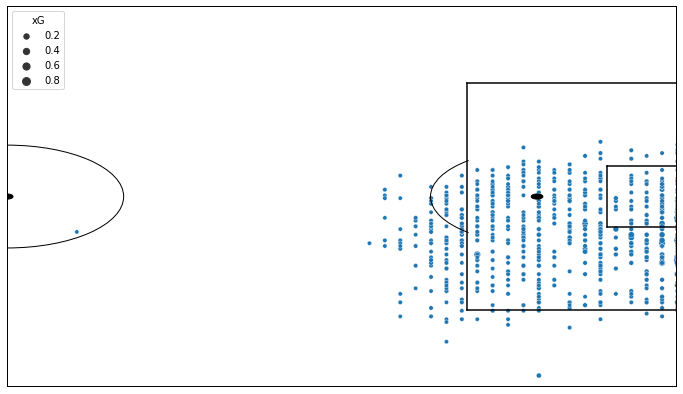

In [ ]:
ax1 = create_full_pitch(x_lims, y_lims)

sns.scatterplot(x="X", y="Y", data=shots_df[shots_df["Player"] == "Cristiano"], size="xG", ax=ax1)

ax1.set_xlim([x_mid, x_lims[1]])
ax1.set_ylim(y_lims)

(0.0, 0.74)

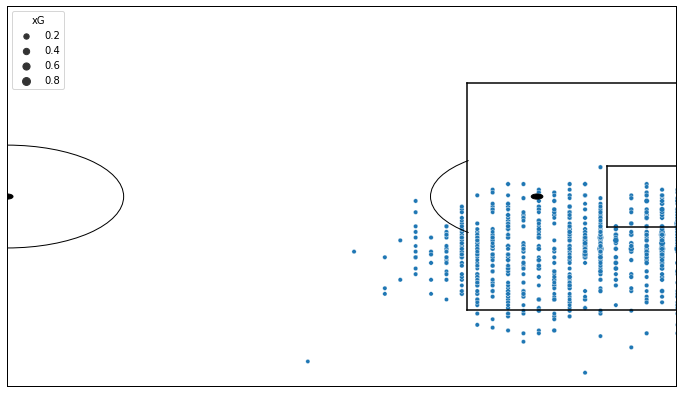

In [ ]:
ax2 = create_full_pitch(x_lims, y_lims)

sns.scatterplot(x="X", y="Y", data=shots_df[shots_df["Player"] == "Messi"], size="xG", ax=ax2)

ax2.set_xlim([x_mid, x_lims[1]])
ax2.set_ylim(y_lims)

## Plot HeatMaps

(0.0, 0.74)

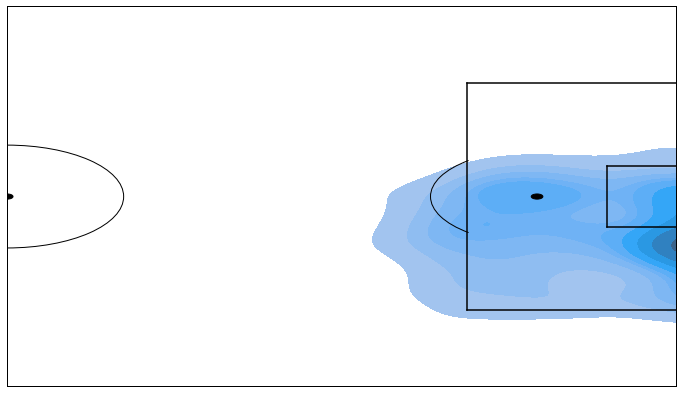

In [ ]:
ax1 = create_full_pitch(x_lims, y_lims)

sns.kdeplot(x="X", y="Y", data=shots_df[shots_df["Player"] == "Cristiano"], shade=True, n_levels=10, ax=ax1)

ax1.set_xlim([x_mid, x_lims[1]])
ax1.set_ylim(y_lims)

(0.0, 0.74)

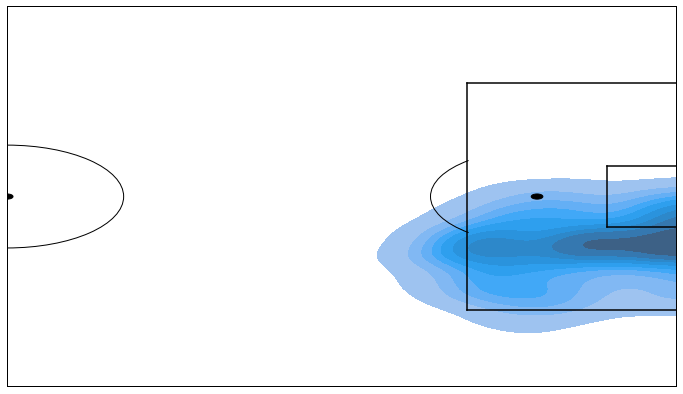

In [ ]:
ax1 = create_full_pitch(x_lims, y_lims)

sns.kdeplot(x="X", y="Y", data=shots_df[shots_df["Player"] == "Messi"], shade=True, n_levels=10, ax=ax1)

ax1.set_xlim([x_mid, x_lims[1]])
ax1.set_ylim(y_lims)

# The Final Comparison

In [ ]:
season_wise_meta_df

,Player,position,games,goals,shots,time,xG,assists,xA,key_passes,season,team,yellow,red,npg,npxG,xGChain,xGBuildup
0,Cristiano,FW,15,8,55,1210,9.80,3,1.55,11,2021,Manchester United,4,0,6,8.27,11.28,2.76
1,Cristiano,Sub,1,0,1,28,0.20,0,0.04,1,2021,Juventus,1,0,0,0.20,0.05,0.02
2,Cristiano,FW,33,29,167,2807,29.84,3,3.85,36,2020,Juventus,3,0,23,23.75,28.64,8.92
3,Cristiano,FWL,33,31,208,2920,29.43,5,6.07,51,2019,Juventus,3,0,19,19.53,26.55,7.22
4,Cristiano,FW,31,21,175,2692,23.32,8,5.19,48,2018,Juventus,3,0,16,18.76,21.85,7.18
5,Cristiano,FW,27,26,178,2304,27.00,5,5.52,40,2017,Real Madrid,1,0,23,24.03,31.62,9.47
6,Cristiano,FWL,29,25,162,2546,25.41,6,4.59,31,2016,Real Madrid,4,0,19,19.47,29.57,8.66
7,Cristiano,AML,36,35,227,3186,35.59,11,8.61,51,2015,Real Madrid,3,0,29,28.90,40.82,9.86
8,Cristiano,FWL,35,48,225,3103,39.31,16,13.60,76,2014,Real Madrid,5,1,38,30.39,43.61,7.52
0,Messi,Sub,11,1,43,869,4.62,4,3.46,24,2021,Paris Saint Germain,0,0,1,4.62,9.99,4.40


In [ ]:
radar_df = season_wise_meta_df.groupby(["Player"])[num_cols].sum().reset_index()

In [ ]:
radar_df

,Player,games,goals,shots,time,xG,assists,xA,key_passes,season,yellow,red,npg,npxG,xGChain,xGBuildup
0,Cristiano,240,223,1398,20796,219.90,57,49.02,345,18161,27,1,173,173.30,233.99,61.61
1,Messi,254,232,1287,21393,196.98,101,109.35,620,16140,27,0,204,167.97,308.74,123.70


In [ ]:
radar_df.columns

Index(['Player', 'games', 'goals', 'shots', 'time', 'xG', 'assists', 'xA',
       'key_passes', 'season', 'yellow', 'red', 'npg', 'npxG', 'xGChain',
       'xGBuildup'],
      dtype='object')

In [ ]:
cols_for_radar = ['goals', 'shots', 'xG',
                  'assists', 'xA', 'key_passes',
                  'npg', 'npxG', 'xGChain', 'xGBuildup']

## Radar Plot for Comparison Analysis

In [ ]:
# Initiate the plotly go figure
fig = go.Figure()
# Add Radar plots for different players:
fig.add_trace(go.Scatterpolar(
    r=radar_df.loc[(radar_df["Player"] == "Cristiano"), cols_for_radar].values.flatten(),
    theta=cols_for_radar,
    fill='toself',
    name='Cristiano'))
fig.add_trace(go.Scatterpolar(
    r=radar_df.loc[(radar_df["Player"] == "Messi"), cols_for_radar].values.flatten(),
    theta=cols_for_radar,
    fill='toself',
    name="Messi"))
# Additional properties for the plot:
fig.update_layout(
    title="Cristiano vs Messi",
polar=dict(
    radialaxis=dict(
    visible=True,
    )),
showlegend=True
)
fig.show()

## Per90 Stats

In [ ]:
per90Cols = ['goals', 'shots', 'xG',
             'assists', 'xA', 'key_passes',
             'npg', 'npxG', 'xGChain', 'xGBuildup']

for col in per90Cols:
    radar_df[col + "Per90"] = radar_df[col].divide(radar_df["time"]).multiply(90)

In [ ]:
cols_for_radar = [i + "Per90" for i in per90Cols]

In [ ]:
radar_df[cols_for_radar]

,goalsPer90,shotsPer90,xGPer90,assistsPer90,xAPer90,key_passesPer90,npgPer90,npxGPer90,xGChainPer90,xGBuildupPer90
0,0.965089,6.050202,0.951673,0.246682,0.212147,1.493076,0.748702,0.750000,1.012651,0.266633
1,0.976020,5.414388,0.828692,0.424905,0.460034,2.608330,0.858225,0.706647,1.298864,0.520404


In [ ]:
# Initiate the plotly go figure
fig = go.Figure()
# Add Radar plots for different players:
fig.add_trace(go.Scatterpolar(
    r=radar_df.loc[(radar_df["Player"] == "Cristiano"), cols_for_radar].sum(),
    theta=cols_for_radar,
    fill='toself',
    name='Cristiano'))
fig.add_trace(go.Scatterpolar(
    r=radar_df.loc[(radar_df["Player"] == "Messi"), cols_for_radar].sum(),
    theta=cols_for_radar,
    fill='toself',
    name="Messi"))
# Additional properties for the plot:
fig.update_layout(
    title="Cristiano vs Messi",
polar=dict(
    radialaxis=dict(
    visible=True,
    )),
showlegend=True
)
fig.show()

# Who Won?